In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ExoplanetHabitabilityData.csv")
df.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,5/14/2014,2008-01,5/14/2014
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,7/23/2014,2011-08,7/23/2014
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,9/19/2023,2023-08,9/19/2023
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,9/4/2018,2017-03,9/6/2018
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,4/25/2018,2009-10,5/14/2014


In [3]:
df.columns

Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38095 entries, 0 to 38094
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          38095 non-null  object 
 1   hostname         38095 non-null  object 
 2   default_flag     38095 non-null  int64  
 3   sy_snum          38095 non-null  int64  
 4   sy_pnum          38095 non-null  int64  
 5   discoverymethod  38095 non-null  object 
 6   disc_year        38095 non-null  int64  
 7   disc_facility    38095 non-null  object 
 8   soltype          38095 non-null  object 
 9   pl_controv_flag  38095 non-null  int64  
 10  pl_refname       38095 non-null  object 
 11  pl_orbper        34909 non-null  float64
 12  pl_orbpererr1    33367 non-null  float64
 13  pl_orbpererr2    33366 non-null  float64
 14  pl_orbperlim     34909 non-null  float64
 15  pl_orbsmax       21539 non-null  float64
 16  pl_orbsmaxerr1   7078 non-null   float64
 17  pl_orbsmaxer

In [5]:
df["habitable"] = df["spl_eqt"].apply(lambda x: 1 if 223 <= x <= 343 else 0)

In [16]:
df = df[["pl_eqt", "pl_insol", "pl_orbsmax", "st_teff", "st_rad", "st_mass", "pl_orbeccen", "habitable"]]

In [17]:
df.columns

Index(['pl_eqt', 'pl_insol', 'pl_orbsmax', 'st_teff', 'st_rad', 'st_mass',
       'pl_orbeccen', 'habitable'],
      dtype='object')

In [18]:
(df.isnull().sum()/len(df))*100

pl_eqt         56.212101
pl_insol       56.078225
pl_orbsmax     43.459772
st_teff         7.859299
st_rad          7.743798
st_mass        15.141095
pl_orbeccen    51.778449
habitable       0.000000
dtype: float64

In [19]:
df.drop(columns=["pl_eqt", "pl_insol", "pl_orbeccen"], inplace=True)
df["pl_orbsmax"].fillna(df["pl_orbsmax"].median(), inplace=True)
df["st_teff"].fillna(df["st_teff"].median(), inplace=True)
df["st_rad"].fillna(df["st_rad"].median(), inplace=True)
df["st_mass"].fillna(df["st_mass"].median(), inplace=True)


In [21]:
df.describe()

,pl_orbsmax,st_teff,st_rad,st_mass,habitable
count,38095.000000,38095.000000,38095.000000,38095.000000,38095.000000
mean,2.686847,5478.291838,1.137135,0.947640,0.018795
std,137.294366,952.054163,1.722819,0.299902,0.135803
min,0.004400,415.000000,0.010000,0.000000,0.000000
25%,0.087000,5162.790000,0.800000,0.840000,0.000000
50%,0.100500,5614.000000,0.950000,0.960000,0.000000
75%,0.115000,5919.000000,1.180000,1.050000,0.000000
max,19000.000000,57000.000000,88.470000,23.560000,1.000000


In [22]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply Winsorization (capping) to columns
df = cap_outliers(df, "pl_orbsmax")
df = cap_outliers(df, "st_teff")
df = cap_outliers(df, "st_rad")
df = cap_outliers(df, "st_mass")


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = df.copy()

# Apply StandardScaler to the relevant columns
scaled_df[["pl_orbsmax", "st_teff", "st_rad", "st_mass"]] = scaler.fit_transform(df[["pl_orbsmax", "st_teff", "st_rad", "st_mass"]])

# Check the scaled data
scaled_df.head()


,pl_orbsmax,st_teff,st_rad,st_mass,habitable
0,1.585781,-1.156381,2.202419,2.176963,0
1,1.585781,0.196384,-0.192530,2.176963,0
2,1.585781,-0.951604,2.202419,2.176963,0
3,1.585781,-1.977037,2.202419,2.176963,0
4,1.585781,-1.780017,2.202419,2.176963,0


In [24]:
X = df[["pl_orbsmax", "st_teff", "st_rad", "st_mass"]]
y = df["habitable"]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
from imblearn.over_sampling import SMOTE

# Define SMOTE
smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Increase habitable planets to 20% of total

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
from collections import Counter
print("New Class Distribution:", Counter(y_resampled))


New Class Distribution: Counter({0: 29921, 1: 5984})


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
from sklearn.metrics import classification_report

# Classification Report for Random Forest
print("📊 Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 1.00
📊 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7458
           1       1.00      1.00      1.00       161

    accuracy                           1.00      7619
   macro avg       1.00      1.00      1.00      7619
weighted avg       1.00      1.00      1.00      7619



In [32]:
lg.fit(X_resampled, y_resampled)
y_pred = lg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7458
           1       0.50      1.00      0.67       161

    accuracy                           0.98      7619
   macro avg       0.75      0.99      0.83      7619
weighted avg       0.99      0.98      0.98      7619



In [34]:
best_rf = RandomForestClassifier(class_weight="balanced", random_state=42)
best_rf.fit(X_resampled, y_resampled)
y_pred_rf = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7458
           1       1.00      1.00      1.00       161

    accuracy                           1.00      7619
   macro avg       1.00      1.00      1.00      7619
weighted avg       1.00      1.00      1.00      7619



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Selecting only important features
features = ["pl_eqt", "pl_insol", "pl_orbsmax", "st_teff", "st_rad", "st_mass", "pl_orbeccen"]
X = df[features]
y = df["habitable"]

# Handle missing values
X = X.fillna(X.median())

# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
from sklearn.metrics import classification_report

# Classification Report for Random Forest
print("📊 Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 1.00
📊 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7458
           1       1.00      1.00      1.00       161

    accuracy                           1.00      7619
   macro avg       1.00      1.00      1.00      7619
weighted avg       1.00      1.00      1.00      7619



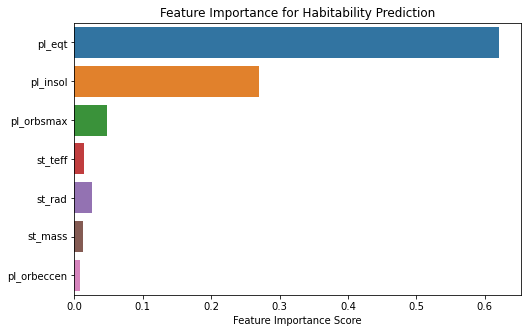

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from the Random Forest model
importances = model.feature_importances_
feature_names = ["pl_eqt", "pl_insol", "pl_orbsmax", "st_teff", "st_rad", "st_mass", "pl_orbeccen"]

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance for Habitability Prediction")
plt.show()


In [9]:
df["habitable"].value_counts()

0    37379
1      716
Name: habitable, dtype: int64

In [10]:
# from imblearn.over_sampling import SMOTE

# # Define SMOTE
# smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Increase habitable planets to 20% of total

# # Apply SMOTE
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Check new class distribution
# from collections import Counter
# print("New Class Distribution:", Counter(y_resampled))


In [11]:
best_rf = RandomForestClassifier(class_weight="balanced", random_state=42)
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7458
           1       1.00      1.00      1.00       161

    accuracy                           1.00      7619
   macro avg       1.00      1.00      1.00      7619
weighted avg       1.00      1.00      1.00      7619



In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lg = LogisticRegression()